In [7]:
!pip install "optimum-neuron==0.0.13" "diffusers==0.21.4" --upgrade
!pip install "sagemaker>=2.197.0"  --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.7/244.7 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 83.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 8.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.5/776.5 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.5/435.5 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [8]:
from huggingface_hub import snapshot_download

# compiled model id
compiled_model_id = "aws-neuron/stable-diffusion-xl-base-1-0-1024x1024"

# save compiled model to local directory
save_directory = "sdxl_neuron"
# Downloads our compiled model from the HuggingFace Hub 
# using the revision as neuron version reference
# and makes sure we exlcude the symlink files and "hidden" files, like .DS_Store, .gitignore, etc.
snapshot_download(compiled_model_id, revision="2.15.0", local_dir=save_directory, local_dir_use_symlinks=False, allow_patterns=["[!.]*.*"])


###############################################
# COMMENT IN BELOW TO COMPILE DIFFERENT MODEL #
###############################################
#
# from optimum.neuron import NeuronStableDiffusionXLPipeline
#
# # model id you want to compile
# vanilla_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
#
# # configs for compiling model
# compiler_args = {"auto_cast": "all", "auto_cast_type": "bf16"}
# input_shapes = {
#   "height": 1024, # width of the image
#   "width": 1024, # height of the image
#   "num_images_per_prompt": 1, # number of images to generate per prompt
#   "batch_size": 1 # batch size for the model
#   }
#
# sd = NeuronStableDiffusionXLPipeline.from_pretrained(vanilla_model_id, export=True, **input_shapes, **compiler_args)
#
# # Save locally or upload to the HuggingFace Hub
# save_directory = "sdxl_neuron"
# sd.save_pretrained(save_directory)

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/huggingface_hub/file_download.py:1212: UserWarning: `local_dir_use_symlinks` parameter is deprecated and will be ignored. The process to download files to a local folder has been updated and do not rely on symlinks anymore. You only need to pass a destination folder as`local_dir`.
For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/download#download-files-to-local-folder.
  warnings.warn(


Fetching 21 files:   0%|          | 0/21 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/678 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

model.neuron:   0%|          | 0.00/1.79G [00:00<?, ?B/s]

model.neuron:   0%|          | 0.00/376M [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/2.61k [00:00<?, ?B/s]

vae_decoder/config.json:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

model.neuron:   0%|          | 0.00/4.17G [00:00<?, ?B/s]

model.neuron:   0%|          | 0.00/792M [00:00<?, ?B/s]

vae_encoder/config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

model.neuron:   0%|          | 0.00/391M [00:00<?, ?B/s]

'/home/ec2-user/sdxl_neuron'

In [9]:
# create code directory in our model directory
!mkdir {save_directory}/code

In [10]:
%%writefile {save_directory}/code/inference.py
import os
# To use two neuron core per worker
os.environ["NEURON_RT_NUM_CORES"] = "2"
import torch
import torch_neuronx
import base64
from io import BytesIO
from optimum.neuron import NeuronStableDiffusionXLPipeline


def model_fn(model_dir):
    # load local converted model into pipeline
    pipeline = NeuronStableDiffusionXLPipeline.from_pretrained(model_dir, device_ids=[0, 1])
    return pipeline


def predict_fn(data, pipeline):
    # extract prompt from data
    prompt = data.pop("inputs", data)
    
    parameters = data.pop("parameters", None)
    
    if parameters is not None:
        generated_images = pipeline(prompt, **parameters)["images"]
    else:
        generated_images = pipeline(prompt)["images"]
        
    # postprocess convert image into base64 string
    encoded_images = []
    for image in generated_images:
        buffered = BytesIO()
        image.save(buffered, format="JPEG")
        encoded_images.append(base64.b64encode(buffered.getvalue()).decode())

    # always return the first 
    return {"generated_images": encoded_images}

Writing sdxl_neuron/code/inference.py


In [11]:
import sagemaker
import boto3
sess = sagemaker.Session()
# sagemaker session bucket -> used for uploading data, models and logs
# sagemaker will automatically create this bucket if it not exists
sagemaker_session_bucket=None
if sagemaker_session_bucket is None and sess is not None:
    # set to default bucket if a bucket name is not given
    sagemaker_session_bucket = sess.default_bucket()

try:
    role = sagemaker.get_execution_role()
except ValueError:
    iam = boto3.client('iam')
    role = iam.get_role(RoleName='sagemaker_execution_role')['Role']['Arn']

sess = sagemaker.Session(default_bucket=sagemaker_session_bucket)

print(f"sagemaker role arn: {role}")
print(f"sagemaker bucket: {sess.default_bucket()}")
print(f"sagemaker session region: {sess.boto_region_name}")
assert sess.boto_region_name in ["us-east-2", "us-east-1"] , "region must be us-east-2 or us-west-2, due to instance availability"

sagemaker role arn: arn:aws:iam::730335623048:role/service-role/SageMaker-ExecutionRole-20240823T144432
sagemaker bucket: sagemaker-us-east-1-730335623048
sagemaker session region: us-east-1


In [19]:
# create a model.tar.gz archive with all the model artifacts and the inference.py script.
%cd {save_directory}
!tar zcvf model.tar.gz *
%cd ..

/home/ec2-user/sdxl_neuron
code/
code/inference.py
model_index.json
model.tar.gz
README.md
scheduler/
scheduler/scheduler_config.json
text_encoder/
text_encoder/config.json
text_encoder/model.neuron
text_encoder_2/
text_encoder_2/config.json
text_encoder_2/model.neuron
tokenizer/
tokenizer/special_tokens_map.json
tokenizer/merges.txt
tokenizer/tokenizer_config.json
tokenizer/vocab.json
tokenizer_2/
tokenizer_2/merges.txt
tokenizer_2/special_tokens_map.json
tokenizer_2/tokenizer_config.json
tokenizer_2/vocab.json
unet/
unet/config.json
unet/model.neuron
vae_decoder/
vae_decoder/config.json
vae_decoder/model.neuron
vae_encoder/
vae_encoder/config.json
vae_encoder/model.neuron
/home/ec2-user


In [20]:
from sagemaker.s3 import S3Uploader

# create s3 uri
s3_model_path = f"s3://{sess.default_bucket()}/neuronx/sdxl"

# upload model.tar.gz
s3_model_uri = S3Uploader.upload(local_path=f"{save_directory}/model.tar.gz", desired_s3_uri=s3_model_path)
print(f"model artifcats uploaded to {s3_model_uri}")

model artifcats uploaded to s3://sagemaker-us-east-1-730335623048/neuronx/sdxl/model.tar.gz


In [21]:
from sagemaker.huggingface.model import HuggingFaceModel

# create Hugging Face Model Class
huggingface_model = HuggingFaceModel(
   model_data=s3_model_uri,        # path to your model.tar.gz on s3
   role=role,                      # iam role with permissions to create an Endpoint
   transformers_version="4.34.1",  # transformers version used
   pytorch_version="1.13.1",       # pytorch version used
   py_version='py310',             # python version used
   model_server_workers=1,         # number of workers for the model server
)

# deploy the endpoint endpoint
predictor = huggingface_model.deploy(
    initial_instance_count=1,      # number of instances
    instance_type="ml.inf2.xlarge", # AWS Inferentia Instance
    volume_size = 100
)

Your model is not compiled. Please compile your model before using Inferentia.


-------------!

In [22]:
from PIL import Image
from io import BytesIO
from IPython.display import display
import base64

# helper decoder
def decode_base64_image(image_string):
  base64_image = base64.b64decode(image_string)
  buffer = BytesIO(base64_image)
  return Image.open(buffer)

# display PIL images as grid
def display_image(image=None,width=500,height=500):
    img = image.resize((width, height))
    display(img)

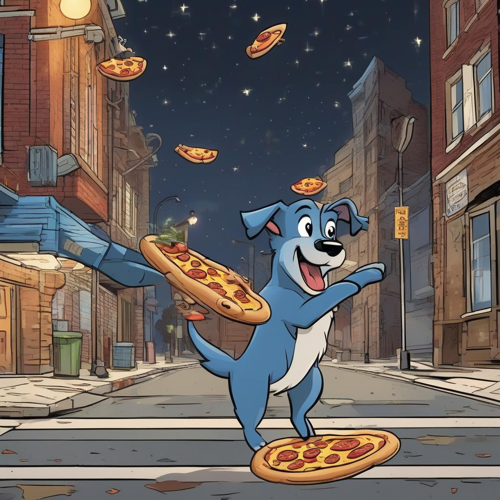

In [23]:
prompt = "A dog trying catch a flying pizza at a street corner, comic book, well lit, night time"

# run prediction
response = predictor.predict(data={
  "inputs": prompt,
  "parameters": {
    "num_inference_steps" : 25,
    "negative_prompt" : "disfigured, ugly, deformed"
    } 
  }
)

# decode and display image
display_image(decode_base64_image(response["generated_images"][0]))

## Text to image inferencing for textile designs

### paisely 

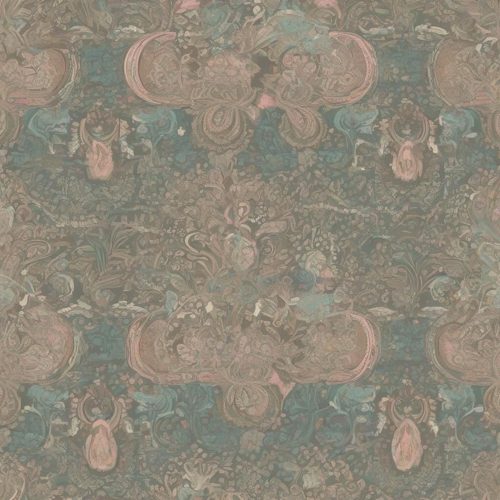

In [25]:
prompt = " A seamless paisely image, paisley-based pattern featuring muted shades of brown, teal, olive, and pink. The pattern has a vintage, bohemian feel and would be perfect for a variety of applications, such as wallpaper, fabric, or home decor. The organic, flowing shapes of the paisleys are complemented by the soft, muted colors, creating a sense of calm and tranquility."
#paisley_197
# run prediction
response = predictor.predict(data={
  "inputs": prompt,
  "parameters": {
    "num_inference_steps" : 25,
    "negative_prompt" : "Inconsistent colors, distorted image, clumsy design, chaotic elements, mismatched aesthetics, unclean and fuzzy patterns, same color scheme, ugly patterns, varied artistic style"
    } 
  }
)

# decode and display image
display_image(decode_base64_image(response["generated_images"][0]))

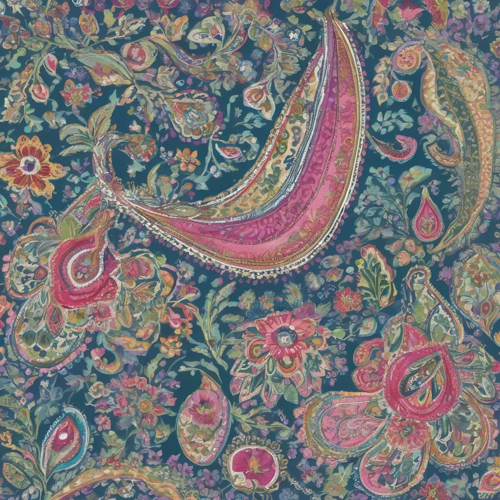

In [27]:
prompt = " A classic bohemian print with a paisley-like floral pattern featuring bright colors such as  pink, mauve, and blue-green. The pattern is reminiscent of traditional Indian paisley designs, with curved, organic shapes and a sense of movement. "
#paisley_168.jpg
# run prediction
response = predictor.predict(data={
  "inputs": prompt,
  "parameters": {
    "num_inference_steps" : 50,
    "negative_prompt" : "Inconsistent colors, distorted image, clumsy design, chaotic elements, mismatched aesthetics, unclean and fuzzy patterns, same color scheme, ugly patterns, varied artistic style"
    } 
  }
)

# decode and display image
display_image(decode_base64_image(response["generated_images"][0]))

## Abstract 

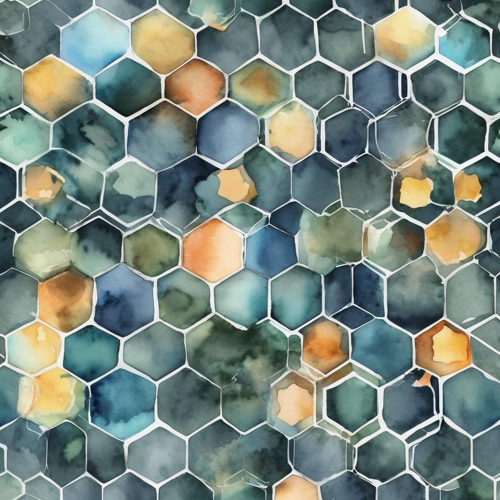

In [28]:
prompt = " This seamless pattern features overlapping hexagons in a watercolor style. The hexagons are arranged in a random order, creating a sense of movement and energy. The pattern has a modern, abstract style "
#abstract_5.jpg
# run prediction
response = predictor.predict(data={
  "inputs": prompt,
  "parameters": {
    "num_inference_steps" : 50,
    "negative_prompt" : "Inconsistent colors, distorted image, clumsy design, chaotic elements, mismatched aesthetics, unclean and fuzzy patterns, same color scheme, ugly patterns, varied artistic style"
    } 
  }
)

# decode and display image
display_image(decode_base64_image(response["generated_images"][0]))

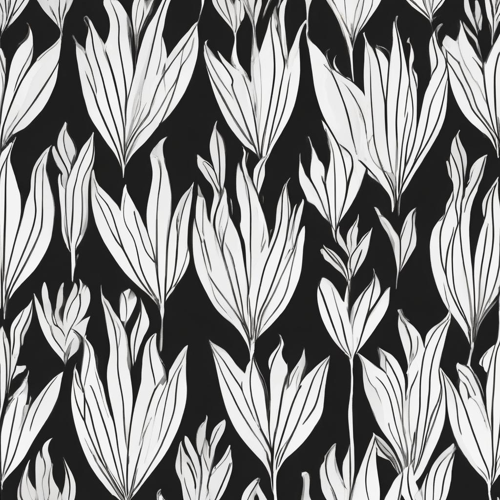

In [29]:
prompt = "  This is a minimalist, black-and-white pattern featuring organic, leaf-like shapes arranged in a staggered, vertical pattern. The leaves have smooth, curved edges and appear to be falling or floating downward "
#abstract_32.jpg
# run prediction
response = predictor.predict(data={
  "inputs": prompt,
  "parameters": {
    "num_inference_steps" : 50,
    "negative_prompt" : "Inconsistent colors, distorted image, clumsy design, chaotic elements, mismatched aesthetics, unclean and fuzzy patterns, same color scheme, ugly patterns, varied artistic style"
    } 
  }
)

# decode and display image
display_image(decode_base64_image(response["generated_images"][0]))

## Minimal

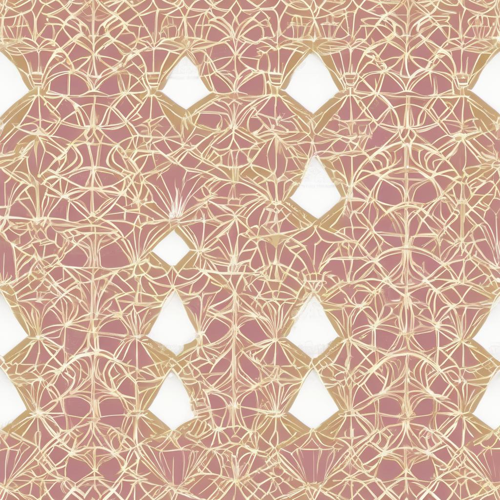

In [31]:
prompt = "  An intricate geometric pattern composed of interlocking diamond and crescent shapes. The diamonds are light gold and white, while the crescents are a gradient of  pink, and yellow. The pattern is set against a solid white background.  "
#minimal_113.jpg
# run prediction
response = predictor.predict(data={
  "inputs": prompt,
  "parameters": {
    "num_inference_steps" : 50,
    "negative_prompt" : "Inconsistent colors, distorted image, clumsy design, chaotic elements, mismatched aesthetics, unclean and fuzzy patterns, same color scheme, ugly patterns, varied artistic style"
    } 
  }
)

# decode and display image
display_image(decode_base64_image(response["generated_images"][0]))

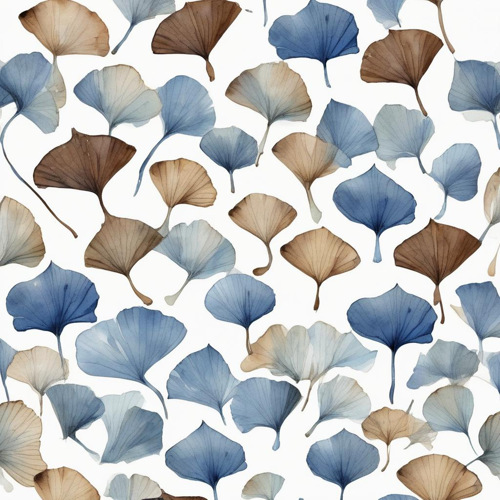

In [32]:
prompt = " Generate a minimal design with watercolor painting of ginkgo leaves in various shades of blue and brown, with a few white highlights. The leaves are arranged in a repeating pattern on a white background."
#minimal_163.jpg
# run prediction
response = predictor.predict(data={
  "inputs": prompt,
  "parameters": {
    "num_inference_steps" : 50,
    "negative_prompt" : "Inconsistent colors, distorted image, clumsy design, chaotic elements, mismatched aesthetics, unclean and fuzzy patterns, same color scheme, ugly patterns, varied artistic style"
    } 
  }
)

# decode and display image
display_image(decode_base64_image(response["generated_images"][0]))

## Floral

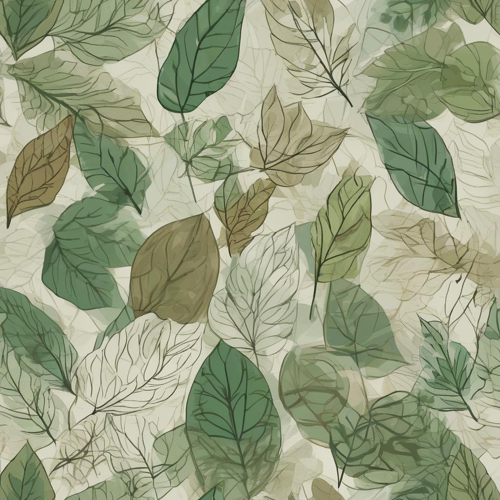

In [35]:
prompt = " Generate a floral image with seamless pattern features a painterly, organic design of overlapping, stylized leaves in various shades of green and brown. The leaves have a hand-drawn, textured appearance and are arranged in a random, scattered manner, creating a sense of movement and energy."
#Floral_122.jpg
# run prediction
response = predictor.predict(data={
  "inputs": prompt,
  "parameters": {
    "num_inference_steps" : 50,
    "negative_prompt" : "Inconsistent colors, distorted image, clumsy design, chaotic elements, mismatched aesthetics, unclean and fuzzy patterns, same color scheme, ugly patterns, varied artistic style"
    } 
  }
)

# decode and display image
display_image(decode_base64_image(response["generated_images"][0]))

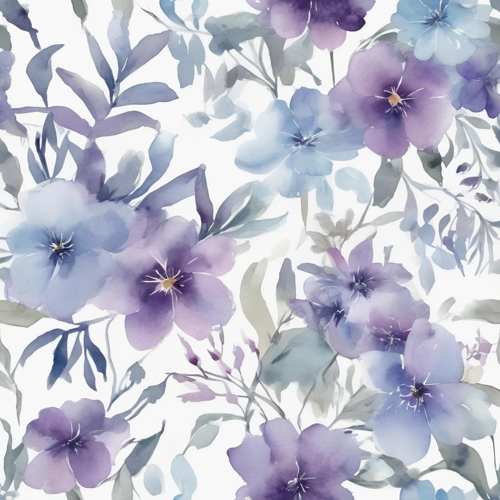

In [36]:
prompt = " Generate a floral image with painterly floral pattern featuring light blue and purple flowers and leaves against a white background. The watercolor-like brushstrokes give the pattern an organic, hand-painted feel. The overall effect is one of softness and romance."
#Floral_99.jpg
# run prediction
response = predictor.predict(data={
  "inputs": prompt,
  "parameters": {
    "num_inference_steps" : 50,
    "negative_prompt" : "Inconsistent colors, distorted image, clumsy design, chaotic elements, mismatched aesthetics, unclean and fuzzy patterns, same color scheme, ugly patterns, varied artistic style"
    } 
  }
)

# decode and display image
display_image(decode_base64_image(response["generated_images"][0]))

## stripes_checks

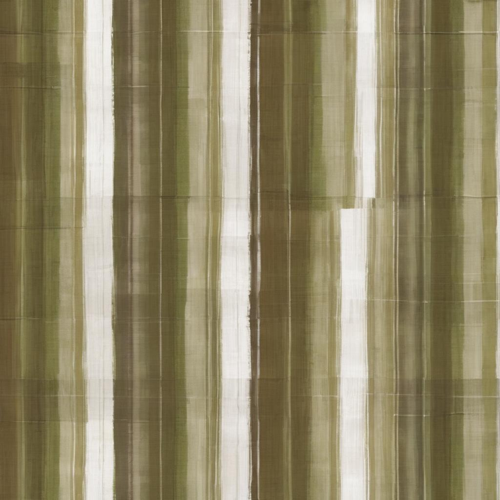

In [37]:
prompt = " Generate a stripes checks textile image with hand-painted pattern featuring a series of vertical brushstrokes in varying widths and shades of brown, olive green, mauve, and white. The brushstrokes have a rough, textured appearance, giving the pattern an organic, painterly feel."
#Floral_99.jpg
# run prediction
response = predictor.predict(data={
  "inputs": prompt,
  "parameters": {
    "num_inference_steps" : 50,
    "negative_prompt" : "Inconsistent colors, distorted image, clumsy design, chaotic elements, mismatched aesthetics, unclean and fuzzy patterns, same color scheme, ugly patterns, varied artistic style"
    } 
  }
)

# decode and display image
display_image(decode_base64_image(response["generated_images"][0]))

In [38]:
predictor.delete_model()
predictor.delete_endpoint()